In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

In [31]:
df = pd.read_csv('bballref_data/pca99_quality_weighted_2000_to_2020.csv', index_col=0)
df.shape
df.head()

(6541, 35)

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33,pc_34
player,,,,,,,,,,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,1.650458,1.258283,2.066522,-2.033202,-0.211906,0.937849,0.196020,0.691721,0.495925,-0.320469,...,-0.109933,-0.118308,0.094827,-0.661910,-0.449109,-0.055356,-0.340783,-0.484517,0.565712,-0.171218
Shareef Abdur-Rahim 2000,3.085993,4.570679,-0.367887,-0.786190,0.122210,2.097189,-0.589084,-0.264385,0.620254,2.194314,...,-1.034249,-0.446651,0.213847,0.519744,0.512128,0.439983,0.537113,-0.150810,0.104330,-0.145183
Ray Allen 2000,-1.872291,4.912036,-1.607104,-0.820923,-0.590136,0.670655,0.410953,-0.943854,-0.261400,0.232416,...,0.698891,0.059722,-0.011952,0.283868,-0.411118,0.133048,0.058302,-0.323615,-0.308041,0.292561
John Amaechi 2000,3.239919,3.019172,2.788119,-1.955055,0.767218,0.859323,0.774088,-1.147147,-0.381833,1.083028,...,0.366846,0.530409,0.001179,-0.871618,0.810195,-0.067150,1.088075,0.366140,0.514171,0.436355
Derek Anderson 2000,-1.624534,3.311526,0.440625,0.094322,-0.390691,0.328207,1.504452,0.161209,0.212977,-0.064083,...,-0.088522,-0.622182,0.105882,-0.570009,-0.527028,-0.390910,-0.063872,-0.418487,-0.094404,-0.217516


In [32]:
df['pc_0'].sort_values()

player
Damon Jones 2008         -7.771357
Steve Kerr 2001          -7.496895
Jason Terry 2018         -7.443377
Dee Brown 2000           -7.246863
Steve Blake 2012         -7.216849
                           ...    
Danny Fortson 2005       10.694066
Shaquille O'Neal 2002    10.823226
Dwight Howard 2009       10.847915
Shaquille O'Neal 2005    11.141590
Shaquille O'Neal 2006    11.472412
Name: pc_0, Length: 6541, dtype: float64

## Determine number of clusters (AIC, BIC, Silouette Score)

Wall time: 2min 52s


Text(0.5, 0, 'Number components')

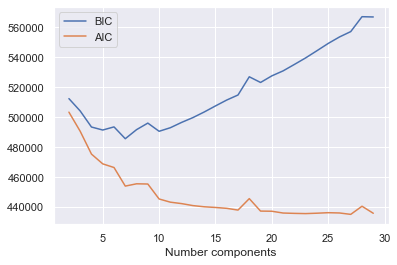

In [24]:
%%time

range_n_components = np.arange(2,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]
plt.plot(range_n_components, [model.bic(df) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components')

Wall time: 24.4 s


Text(0.5, 1.0, 'Silhouette Sore')

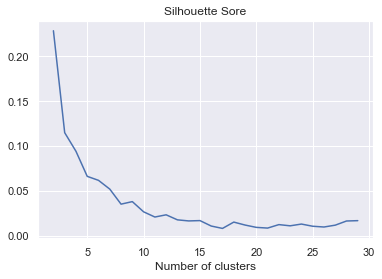

In [25]:
%%time
## Evaluate silhoutte score for each model
labels = {n: model.predict(df) for n, model in zip(range_n_components, models)}
silhoutte_scores = [silhouette_score(df, labels[n], random_state=seed) for n in range_n_components]
plt.plot(range_n_components, silhoutte_scores)
plt.xlabel('Number of clusters')
plt.title('Silhouette Sore');

## Build GMM, cluster

In [ ]:
GaussianMixture?

In [33]:
%%time
n_comps = 11

gmm = GaussianMixture(n_components=n_comps, covariance_type='full', max_iter=10_000, n_init=8, random_state=seed)
gmm.fit(df)

hard_labels = gmm.predict(df)
soft_labels = gmm.predict_proba(df)
df_clusters = pd.DataFrame(hard_labels, index=df.index, columns=['label'])
soft_cols = [f'cluster_{n}' for n in range(gmm.n_components)]
df_clusters[soft_cols] = soft_labels
df_clusters = df_clusters.round(6)  ## for better visual
df_clusters.head()

Wall time: 24.8 s


,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
player,,,,,,,,,,,,
Tariq Abdul-Wahad 2000,8,0.134602,0.0,0.000000,0.0,0.000000,0.008675,0.000000,0.0,0.856722,0.0,0.0
Shareef Abdur-Rahim 2000,5,0.000087,0.0,0.000000,0.0,0.000000,0.999912,0.000000,0.0,0.000000,0.0,0.0
Ray Allen 2000,4,0.000000,0.0,0.000025,0.0,0.999975,0.000000,0.000000,0.0,0.000000,0.0,0.0
John Amaechi 2000,6,0.000048,0.0,0.000000,0.0,0.000000,0.000000,0.999952,0.0,0.000000,0.0,0.0
Derek Anderson 2000,2,0.000000,0.0,0.905924,0.0,0.000000,0.000000,0.000000,0.0,0.094076,0.0,0.0


In [50]:
# 12 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

6     958
1     911
2     864
11    631
4     627
7     573
3     478
5     458
0     440
8     228
9     201
10    172
Name: label, dtype: int64

In [26]:
# 12 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

6     958
1     911
2     864
11    631
4     627
7     573
3     478
5     458
0     440
8     228
9     201
10    172
Name: label, dtype: int64

In [34]:
# 11 clusters, n_init=8, max_iter=10_000
df_clusters['label'].value_counts()

2     1079
7      995
4      729
8      708
0      676
1      612
9      560
10     464
6      355
5      210
3      153
Name: label, dtype: int64

In [9]:
## 10 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

1    1183
2     897
4     772
3     756
6     661
7     613
9     527
8     498
0     336
5     298
Name: label, dtype: int64

In [21]:
## 14 clusters, n_init=8, max_iter=10000
df_clusters['label'].value_counts()

3     836
4     798
2     657
0     621
6     563
9     482
10    437
8     434
5     408
13    396
1     301
7     249
11    206
12    153
Name: label, dtype: int64

In [ ]:
## 8 clusters, n_init=5, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=10, max_iter=10000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 10 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 12 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

In [ ]:
## 11 clusters, n_init=5, max_iter=1000
df_clusters['label'].value_counts()

### Look at clusters

In [35]:
## Sample each cluster

for n in range(0,gmm.n_components):
    print('label:', n, 'total:', len(df_clusters[df_clusters['label']==n]))
    print(df_clusters[df_clusters['label']==n].sample(20)[['label', f'cluster_{n}']])
    print('\n')

label: 0 total: 676
                              label  cluster_0
player                                        
Wally Szczerbiak 2001             0   0.552287
Tony Allen 2014                   0   0.996544
Luc Mbah a Moute 2012             0   0.999666
Michael Beasley 2014              0   0.615862
Rondae Hollis-Jefferson 2020      0   0.999992
Chris Gatling 2001                0   1.000000
Chris Andersen 2014               0   0.997242
Kevin Love 2011                   0   0.997895
Donnell Harvey 2003               0   0.999957
Isaac Austin 2000                 0   1.000000
Charlie Villanueva 2008           0   1.000000
Hakim Warrick 2009                0   0.998918
Dwight Powell 2018                0   1.000000
Kyle Anderson 2020                0   0.864177
David Nwaba 2018                  0   0.982560
Hedo Türkoğlu 2001                0   0.989733
Ivan Rabb 2019                    0   1.000000
Josh Childress 2005               0   0.999972
Dwight Powell 2019                0   1.

In [36]:
## with n clusters = 18
players  = [
            'Chris Paul',
            'Steve Nash',
            'Tony Parker',
            'Jamal Crawford',
            'Lou Williams',
            'Goran Dragic'
            'Kobe Bryant',
            'LeBron James',
            'Paul Pierce',
            'Dirk',
            'Kobe',
            'Yao',
            'Chris Webber'
            "Shaquille O'Neal",
            'Dwight Howard',
            'Roy Hibbert',
            'Marcus Smart',
            'Jae Crowder'
            'Draymond Green',
            'Stephen Curry',
            'Klay Thompson',
            'Eddie House',
            'Peja',
            'Rashard Lewis'
            'Jameer Nelson',
            'Ray Allen',
            'Kevin Garnett',
            'Deandre Jordan',
            'Paul George',
            'James Harden',
            'Giannis',
            'Buddy Hield',
            'Kemba Walker',
            'Lamarcus',
            'Bradley Beal',
            'Russel Westbrook',
            'Kyrie Irving',
            'John Wall',
            'James Posey',
            'Hedo',
            'Gerald Green',
            'Ricky Davis',
            'Antoine Walker',
            'Duncan Robinson',
            'Rashard Lewis',
            'J.R. Smith',
            'Jae Crowder',
            'Robert Covington'
           ]
    
for player in players:
    print(df_clusters[df_clusters.index.str.contains(player)]['label'])

player
Chris Paul 2006    10
Chris Paul 2007    10
Chris Paul 2008    10
Chris Paul 2009    10
Chris Paul 2010     9
Chris Paul 2011    10
Chris Paul 2012    10
Chris Paul 2013    10
Chris Paul 2014    10
Chris Paul 2015    10
Chris Paul 2016    10
Chris Paul 2017    10
Chris Paul 2018    10
Chris Paul 2019     4
Chris Paul 2020    10
Name: label, dtype: int64
player
Steve Nash 2000     9
Steve Nash 2001    10
Steve Nash 2002    10
Steve Nash 2003     4
Steve Nash 2004     9
Steve Nash 2005    10
Steve Nash 2006    10
Steve Nash 2007    10
Steve Nash 2008    10
Steve Nash 2009    10
Steve Nash 2010    10
Steve Nash 2011    10
Steve Nash 2012    10
Steve Nash 2013     9
Name: label, dtype: int64
player
Tony Parker 2002    9
Tony Parker 2003    4
Tony Parker 2004    4
Tony Parker 2005    4
Tony Parker 2006    4
Tony Parker 2007    4
Tony Parker 2008    4
Tony Parker 2009    4
Tony Parker 2010    8
Tony Parker 2011    4
Tony Parker 2012    4
Tony Parker 2013    4
Tony Parker 2014    4
Ton

In [37]:
df_multi_clusters = df_clusters[(df_clusters.iloc[:, 1:] < 0.9).all(axis=1)]
df_multi_clusters.shape
df_multi_clusters.sample(15)

(689, 12)

,label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
player,,,,,,,,,,,,
Marcus Morris 2013,1,0.003038,0.846559,0.149162,0.0,0.000000,0.000000,0.000000,0.0,0.001242,0.000000,0.000000
Rodney Hood 2018,10,0.000000,0.000000,0.386469,0.0,0.000000,0.000000,0.000000,0.0,0.000100,0.000000,0.613431
T.J. Ford 2007,9,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000046,0.724843,0.275111
Jermaine O'Neal 2007,6,0.000000,0.000000,0.000000,0.0,0.000000,0.115722,0.884278,0.0,0.000000,0.000000,0.000000
Mario Elie 2000,2,0.000002,0.002840,0.876413,0.0,0.120702,0.000000,0.000000,0.0,0.000015,0.000000,0.000028
Markel Brown 2016,2,0.000245,0.000619,0.892625,0.0,0.000000,0.000000,0.000000,0.0,0.106511,0.000000,0.000000
Delonte West 2010,2,0.000000,0.000000,0.849934,0.0,0.000000,0.000000,0.000000,0.0,0.146174,0.000000,0.003891
D'Angelo Russell 2016,2,0.000000,0.000000,0.516347,0.0,0.000000,0.000000,0.000000,0.0,0.000298,0.129423,0.353932
Caron Butler 2010,8,0.000000,0.000000,0.000000,0.0,0.145858,0.007936,0.000000,0.0,0.846200,0.000000,0.000006


## Write out `df_clusters` and Combined DF with `clean_rate`

In [55]:
df_clusters.to_csv('bballref_data/gmm_clusters12_quality_weighted.csv')

In [65]:
df_clean_rates = pd.read_csv('bballref_data/clean_rates_1997_to_2020.csv', index_col=0)
df_clean_rates = df_clean_rates[df_clean_rates['year'] >= 2000]

df = df_clean_rates.merge(df_clusters, left_index=True, right_index=True)
df.to_csv('bballref_data/clusters12_all_clean_data_2000_to_2020.csv')